In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [7]:
# Load the dataset
housing = fetch_california_housing(as_frame=True)

# Convert to pandas DataFrame
df = housing.frame

# Display the first few rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [8]:
#checking the numbers of rows and coloums in the dataframe

df.shape

(20640, 9)

In [9]:
#we have 20640 rows and 9 coulums so we need to find out if there is any missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [10]:
#statistical measures of the dataset like mean,median, std deviation
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
#understanding the correlation between various features in the dataset

In [12]:
correlation = df.corr()

<Axes: >

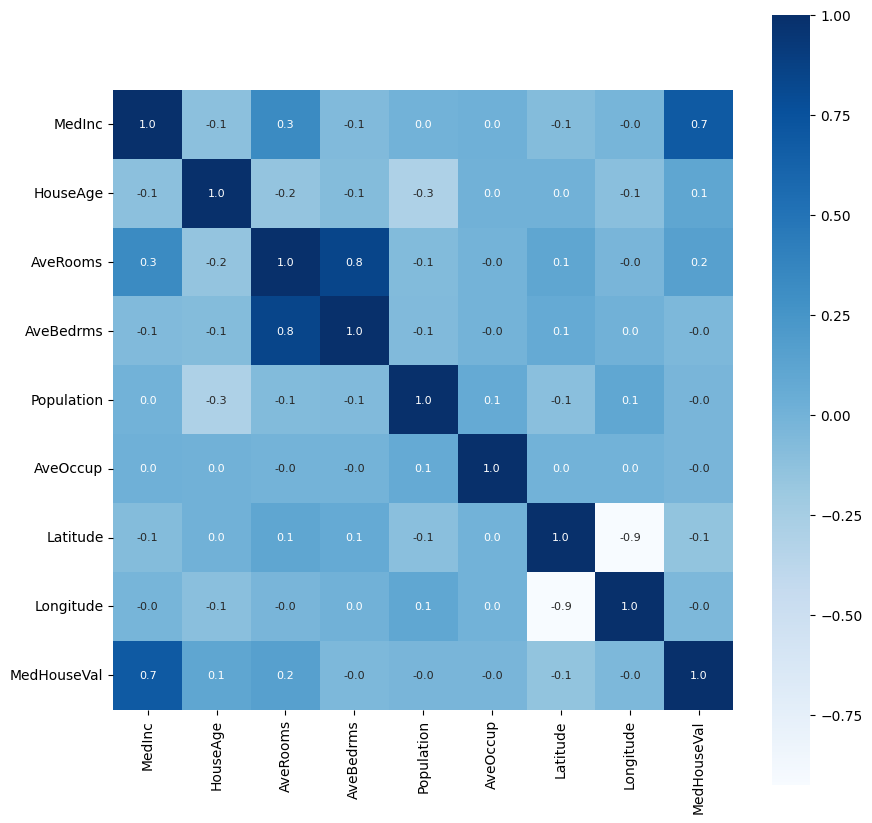

In [13]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
X = df.drop(['MedHouseVal'], axis=1)
Y = df['MedHouseVal']

In [15]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [16]:
#spliting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape,X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [20]:
# Model Training Using XGBoost Regressor
#loading rhe model

model = XGBRegressor()


In [21]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
#Prediction on Training data
# Accuracy for the prediction on training data
training_data_prediction = model.predict(X_train)

In [23]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [24]:
#Evaluation of our trainined model , as we can't use accuracy score in the regression model so we R sqaure error and Mean Absolute Error

score_1 = metrics.r2_score(Y_train, training_data_prediction) #R square error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction) #Mean Absolute Error

In [26]:
print ("R square error: ", score_1)
print ("Mean Absolute Error: ", score_2)

R square error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


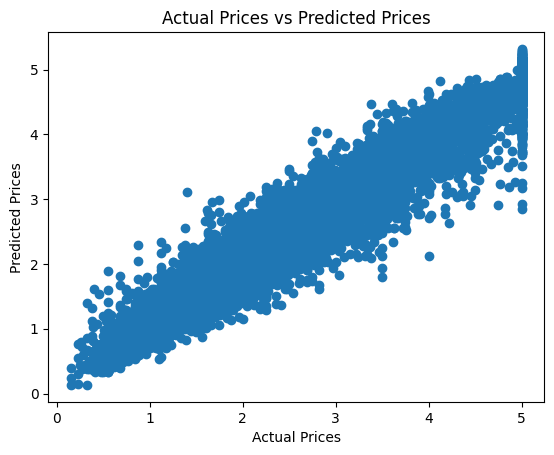

In [30]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [27]:
#Prediction on Test data
# Accuracy for the prediction on Test data
test_data_prediction = model.predict(X_test)

In [29]:
#Evaluation of our trainined model , as we can't use accuracy score in the regression model so we R sqaure error and Mean Absolute Error

score_3 = metrics.r2_score(Y_test, test_data_prediction) #R square error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction) #Mean Absolute Error
print ("R square error: ", score_3)
print ("Mean Absolute Error: ", score_4)

R square error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186
